iphone sales analysis

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

In [3]:
data = pd.read_csv("apple_products.csv")

In [4]:
data

,Product Name,Product URL,Brand,Sale Price,Mrp,Discount Percentage,Number Of Ratings,Number Of Reviews,Upc,Star Rating,Ram
0,"APPLE iPhone 8 Plus (Gold, 64 GB)",https://www.flipkart.com/apple-iphone-8-plus-g...,Apple,49900,49900,0,3431,356,MOBEXRGV7EHHTGUH,4.6,2 GB
1,"APPLE iPhone 8 Plus (Space Grey, 256 GB)",https://www.flipkart.com/apple-iphone-8-plus-s...,Apple,84900,84900,0,3431,356,MOBEXRGVAC6TJT4F,4.6,2 GB
2,"APPLE iPhone 8 Plus (Silver, 256 GB)",https://www.flipkart.com/apple-iphone-8-plus-s...,Apple,84900,84900,0,3431,356,MOBEXRGVGETABXWZ,4.6,2 GB
3,"APPLE iPhone 8 (Silver, 256 GB)",https://www.flipkart.com/apple-iphone-8-silver...,Apple,77000,77000,0,11202,794,MOBEXRGVMZWUHCBA,4.5,2 GB
4,"APPLE iPhone 8 (Gold, 256 GB)",https://www.flipkart.com/apple-iphone-8-gold-2...,Apple,77000,77000,0,11202,794,MOBEXRGVPK7PFEJZ,4.5,2 GB
...,...,...,...,...,...,...,...,...,...,...,...
57,"APPLE iPhone SE (Black, 64 GB)",https://www.flipkart.com/apple-iphone-se-black...,Apple,29999,39900,24,95909,8161,MOBFWQ6BR3MK7AUG,4.5,4 GB
58,"APPLE iPhone 11 (Purple, 64 GB)",https://www.flipkart.com/apple-iphone-11-purpl...,Apple,46999,54900,14,43470,3331,MOBFWQ6BTFFJKGKE,4.6,4 GB
59,"APPLE iPhone 11 (White, 64 GB)",https://www.flipkart.com/apple-iphone-11-white...,Apple,46999,54900,14,43470,3331,MOBFWQ6BVWVEH3XE,4.6,4 GB
60,"APPLE iPhone 11 (Black, 64 GB)",https://www.flipkart.com/apple-iphone-11-black...,Apple,46999,54900,14,43470,3331,MOBFWQ6BXGJCEYNY,4.6,4 GB


In [5]:
print(data.isnull().sum())

Product Name           0
Product URL            0
Brand                  0
Sale Price             0
Mrp                    0
Discount Percentage    0
Number Of Ratings      0
Number Of Reviews      0
Upc                    0
Star Rating            0
Ram                    0
dtype: int64


In [6]:
print(data.describe())

          Sale Price            Mrp  Discount Percentage  Number Of Ratings  \
count      62.000000      62.000000            62.000000          62.000000   
mean    80073.887097   88058.064516             9.951613       22420.403226   
std     34310.446132   34728.825597             7.608079       33768.589550   
min     29999.000000   39900.000000             0.000000         542.000000   
25%     49900.000000   54900.000000             6.000000         740.000000   
50%     75900.000000   79900.000000            10.000000        2101.000000   
75%    117100.000000  120950.000000            14.000000       43470.000000   
max    140900.000000  149900.000000            29.000000       95909.000000   

       Number Of Reviews  Star Rating  
count          62.000000    62.000000  
mean         1861.677419     4.575806  
std          2855.883830     0.059190  
min            42.000000     4.500000  
25%            64.000000     4.500000  
50%           180.000000     4.600000  
75%     

In [ ]:
#top 10 iphone models

In [11]:
highest_rated = data.sort_values (by = ["Star Rating"],ascending = False)
highest_rated = highest_rated.head(10)
print(highest_rated['Product Name'])

20     APPLE iPhone 11 Pro Max (Midnight Green, 64 GB)
17         APPLE iPhone 11 Pro Max (Space Grey, 64 GB)
16    APPLE iPhone 11 Pro Max (Midnight Green, 256 GB)
15               APPLE iPhone 11 Pro Max (Gold, 64 GB)
14              APPLE iPhone 11 Pro Max (Gold, 256 GB)
0                    APPLE iPhone 8 Plus (Gold, 64 GB)
29                     APPLE iPhone 12 (White, 128 GB)
32          APPLE iPhone 12 Pro Max (Graphite, 128 GB)
35                     APPLE iPhone 12 (Black, 128 GB)
36                      APPLE iPhone 12 (Blue, 128 GB)
Name: Product Name, dtype: object


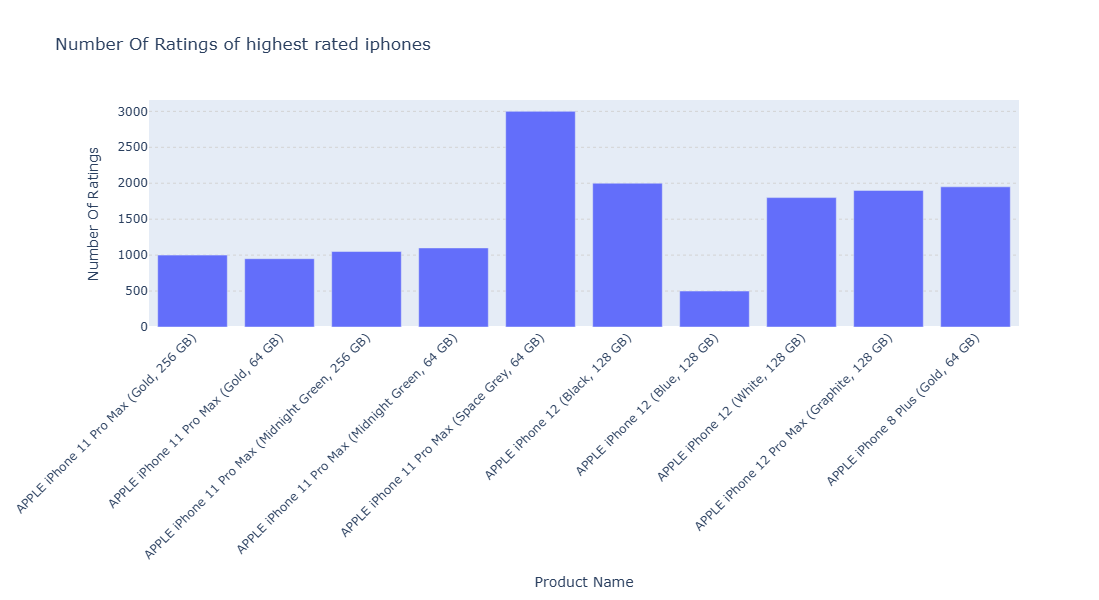

In [22]:
#Number Of Ratings of the highest rated product of iphone on flipcart
highest_rated = pd.DataFrame(data)
highest_rated['Product Name'] = highest_rated['Product Name'].astype('category')
iphones = highest_rated['Product Name'].value_counts()


labels = iphones.index
counts = highest_rated["Number Of Ratings"]

figure = px.bar(
    x=labels,
    y=counts,
    title="Number Of Ratings of highest rated iphones",
    labels={'x': 'Product Name', 'y': 'Number Of Ratings'} # Added labels for clarity
)

# Update layout to adjust y-axis properties
figure.update_layout(
    yaxis=dict(
        dtick=500,  # Set the interval between ticks to 500. Adjust this value as needed.
                    # For example, if your max count is 3000, 500 might be good.
                    # If your max count is 10000, 1000 or 2000 might be better.
        tickmode='linear', # Ensures ticks are spaced linearly
        showgrid=True, # Show grid lines for better readability
        gridcolor='lightgrey', # Set grid color
        griddash='dot' # Set grid style
    ),
    height=600, # Increase overall figure height for more vertical space
    xaxis_tickangle=-45 # Angle x-axis labels to prevent overlap
)

figure.show()


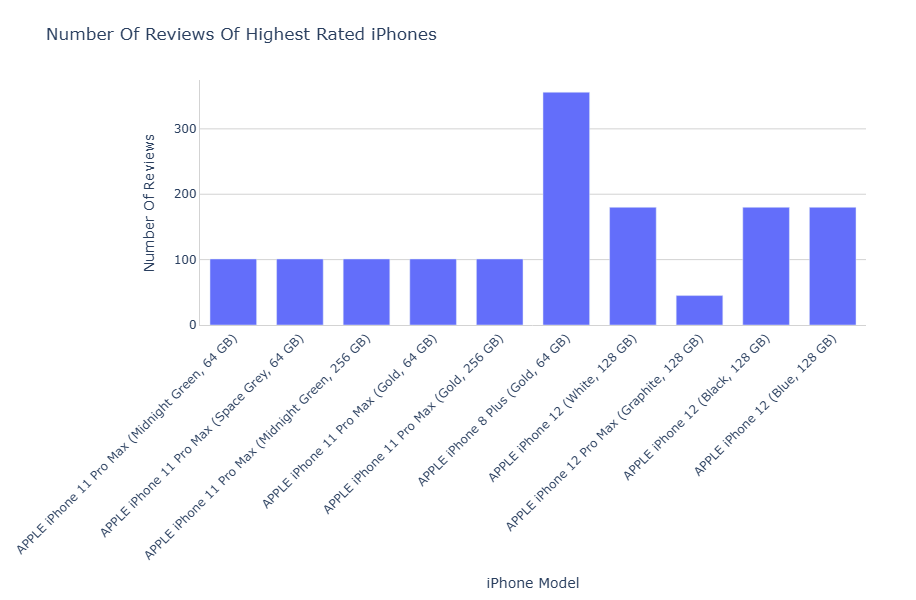

In [45]:
#Number Of Ratings of the highest rated product of iphone on flipcart
highest_rated = data.sort_values(by=["Star Rating"], ascending=False)
highest_rated = highest_rated.head(10)

# Create the figure with spacing and appearance
figure = px.bar(
    highest_rated, 
    x='Product Name',  # Use the actual column name
    y='Number Of Reviews',       # Replace with your actual review count column
    title="Number Of Reviews Of Highest Rated iPhones",
    labels={'Product Name': 'iPhone Model', 'Reviews': 'Number of Reviews'},  # Rename axes
    height=600,        # Increase height for better readability
    width=900          # Set width
)

# Further customize the figure
figure.update_layout(
    # Add more space between title and plot
    title_pad=dict(t=20),
    
    # Improve margins
    margin=dict(l=50, r=50, t=80, b=50),
    
    # Rotate x-axis labels if they're overlapping
    xaxis_tickangle=-45,
    
    # Add space between bars
    bargap=0.3,        # Gap between bars in the same group
    
    # Customize the appearance
    plot_bgcolor='white',
    xaxis=dict(
        showgrid=False,
        showline=True,
        linecolor='lightgrey'
    ),
    yaxis=dict(
        showgrid=True,
        gridcolor='lightgrey',
        showline=True,
        linecolor='lightgrey'
    )
)

figure.show()

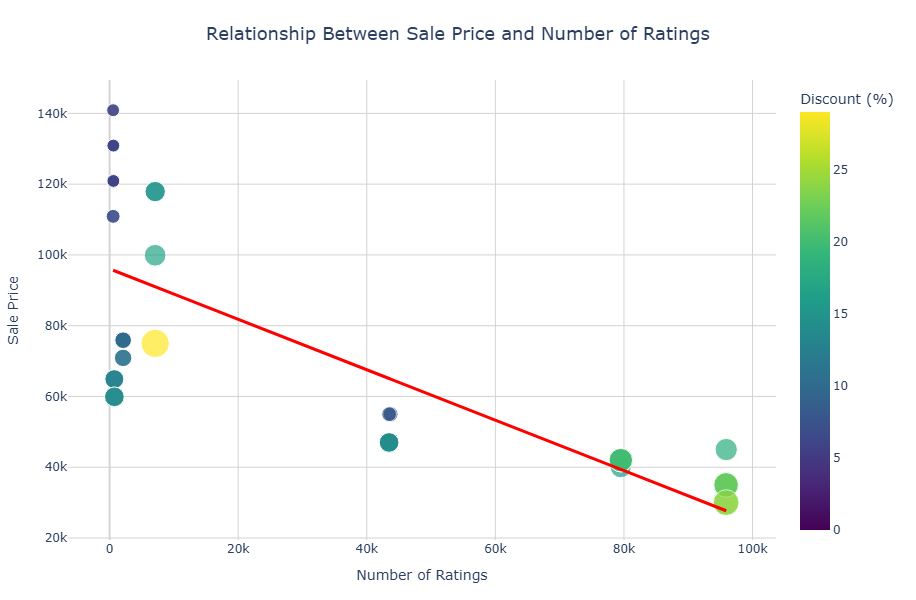

In [52]:
#Relationship Between Sale Price and Number of Ratings
figure = px.scatter(
    data_frame=data, 
    x="Number Of Ratings", 
    y="Sale Price", 
    size="Discount Percentage", 
    trendline="ols",
    title="Relationship Between Sale Price and Number of Ratings",
    labels={"Number Of Ratings": "Number of Ratings", 
            "Sale Price": "Sale Price ", 
            "Discount Percentage": "Discount (%)"},
    height=600,
    width=800,
    opacity=0.7,  # Make points slightly transparent
    color="Discount Percentage",  # Color by discount percentage
    color_continuous_scale="Viridis",  # Use a nice color scale
)

# Enhance the layout
figure.update_layout(
    title_x=0.5,  # Center the title
    title_font=dict(size=18),  # Larger title font
    plot_bgcolor='white',  # White background
    margin=dict(l=60, r=40, t=80, b=60),  # Add more margin space
    
    # Improve the legend
    legend_title_text="Discount Percentage",
    
    # Improve the axes
    xaxis=dict(
        title_font=dict(size=14),
        tickfont=dict(size=12),
        showgrid=True,
        gridcolor='lightgrey',
        zeroline=True,
        zerolinecolor='lightgrey',
    ),
    yaxis=dict(
        title_font=dict(size=14),
        tickfont=dict(size=12),
        showgrid=True,
        gridcolor='lightgrey',
        zeroline=True,
        zerolinecolor='lightgrey',
    )
)

# Make the trendline more visible
figure.update_traces(
    selector=dict(mode='lines'),  # Select only the trendline
    line=dict(width=3, color='red'),  # Make it thicker and red
)

figure.show()

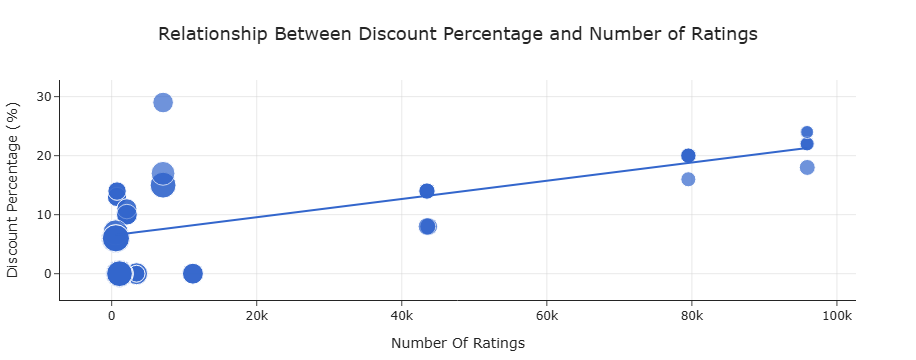

In [60]:
# Relationship Between Discount Percentage and Number of Ratings
figure = px.scatter(
    data_frame=data, 
    x="Number Of Ratings", 
    y="Discount Percentage", 
    size="Sale Price", 
    trendline="ols",
    title="Relationship Between Discount Percentage and Number of Ratings",
    template="simple_white",  # Clean white template
    color_discrete_sequence=["#3366CC"]  # Consistent color scheme
)

# Enhance layout with better spacing and formatting
figure.update_layout(
    title_font_size=18,
    title_x=0.5,  # Center the title
    yaxis_title="Discount Percentage (%)",
    xaxis_title="Number Of Ratings",
    margin=dict(l=60, r=60, t=80, b=60),
    legend_title_text="Sale Price",
    plot_bgcolor="white",
    hoverlabel=dict(bgcolor="white", font_size=12)
)

# Improve axis formatting
figure.update_xaxes(showgrid=True, gridwidth=0.5, gridcolor='lightgray')
figure.update_yaxes(showgrid=True, gridwidth=0.5, gridcolor='lightgray')

# Display the figure
figure.show()